#### Import the packages and functions

In [18]:
## --- Import the packages and functions
from tools.functions import *
import matplotlib.pyplot as plt
import pickle

#### Definitions, parameters and directory paths

In [19]:
# --- Definitions, parameters and directory paths
# Define the base path for your images
base_path       = '../img'

# Define the path to your dataset within the base path and using gray images
dataset_path    = f'{base_path}/dataset/gray/'

# List of ratios to be used for splitting the dataset into training and testing sets
train_ratio     = [0.75, 0.8, 0.85, 0.9]

# Threshold for normalizing the image data
thresh_normalization = 0.500

# List of thresholds to be considered 'good' in evaluation
thresh_good     = [0.00, 0.10, 0.15]

# Range of iterations to be performed during model training
iterations      = range(1, 6)

# Define different classification types for the model to learn. Each type is associated with a list of categories.
classification_types = {'n_grains': ['50', '60', '70', '80', '90', '100'], 
                        'defect_stratified': ['0%', '10%', '15%', '20%', '25%', '30%'], 
                        'defect_thresholded': ['With defects', 'Healthy']}

# Define labels for the x and y axes in plotting
x_label = 'Predicted'
y_label = 'True'

## ---

#### Reading the dataframes and classification results

In [20]:
with open("../resources/df_train.pkl", "rb") as f:
    df_train = pickle.load(f)

with open("../resources/df_test.pkl", "rb") as f:
    df_test = pickle.load(f)

with open("../resources/classification_metrics_results.pickle", "rb") as f:
    classification_metrics_results = pickle.load(f)

with open("../resources/confusion_matrices.pickle", "rb") as f:
    confusion_matrices = pickle.load(f)

#### Exports a certain confusion matrix in pdf format

In [21]:
train_ratio_item = train_ratio[0]
thresh_good_item = thresh_good[1]
classification_type = 'n_grains'
image_name = 'cm_075_ngrains'

cm = confusion_matrices[train_ratio_item][thresh_good_item][classification_type]['mean']
export_confusion_matrix_as_image(cm, classification_types[classification_type], f"..\{image_name}.pdf", [x_label, y_label])

#### Shows the classification results for a certain specification

In [22]:
train_ratio_item = train_ratio[0]
thresh_good_item = thresh_good[1]
classification_type = 'defect_thresholded'

display(pd.DataFrame(classification_metrics_results[train_ratio_item][thresh_good_item][classification_type]['mean']).transpose())

,precision,recall,f1-score,support
With defects,0.837112,0.851592,0.843288,81.600000
Healthy,0.892611,0.881642,0.886531,115.200000
accuracy,0.868465,0.868465,0.868465,0.868465
macro avg,0.864862,0.866617,0.864910,196.800000
weighted avg,0.870449,0.868465,0.868672,196.800000




df = df_train.loc[(df_train['defect_percentage'] == 0.00) & (df_train['grain_quantity'] == 100), ['npixels_1to255_per_grain', 'ratio_80to255_by_1to80', 'normalized_ratio_80to255_by_1to80']].copy()
display(len(df))

# Assuming df is the DataFrame you created earlier
x = np.arange(len(df))
y1 = df['ratio_80to255_by_1to80']
y2 = df['normalized_ratio_80to255_by_1to80']




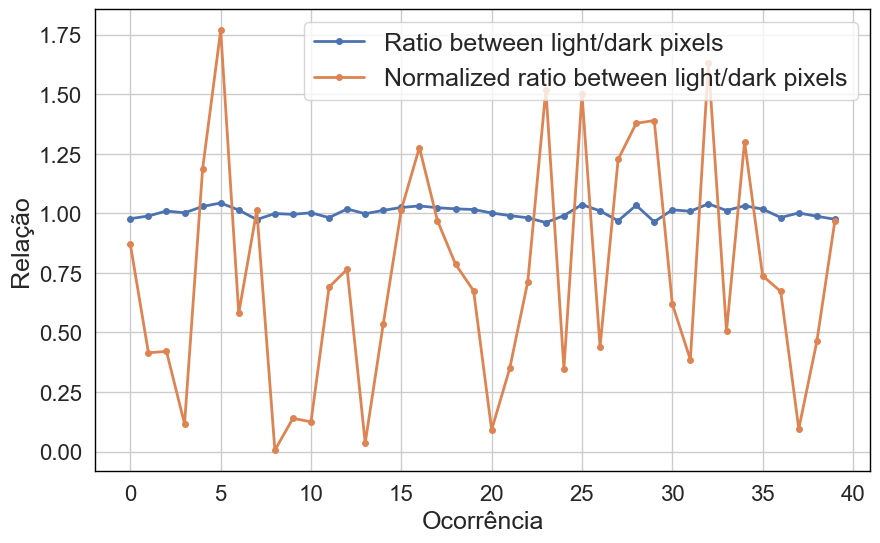

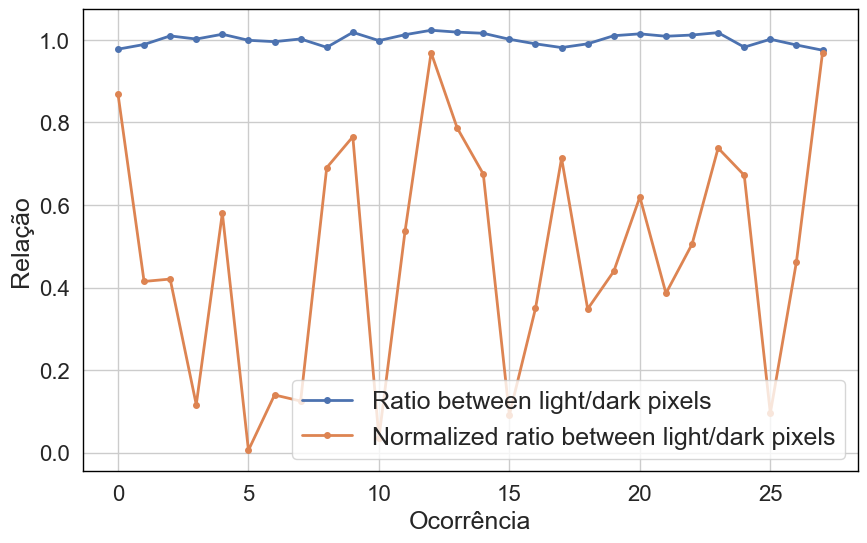

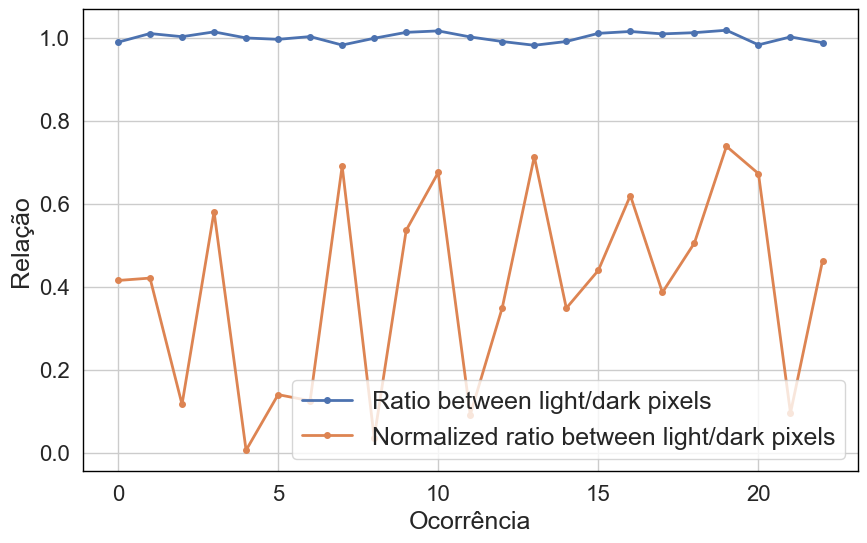

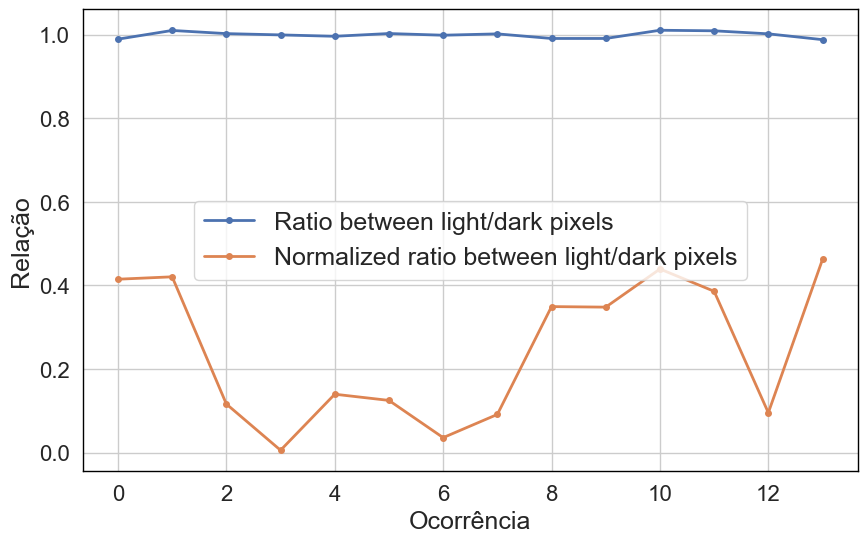

In [35]:
def plot_ratio(df_train, df_test, normalization_thresh, save_path):
    # Copy and normalize dataset
    df_copy = df_train.copy()
    df_copy, df_test = normalize_dataset(df_copy, df_test, 'ratio_80to255_by_1to80', normalization_thresh)
    df_copy = df_copy.loc[(df_copy['defect_percentage'] == 0.00) & (df_copy['grain_quantity'] == 100), ['npixels_1to255_per_grain', 'ratio_80to255_by_1to80', 'normalized_ratio_80to255_by_1to80']].copy()
    
    # Plot
    x = np.arange(len(df_copy))
    y1 = df_copy['ratio_80to255_by_1to80']
    y2 = df_copy['normalized_ratio_80to255_by_1to80']

    sns.set(style='whitegrid', context='notebook')
    plt.figure(figsize=(10, 6))

    plt.plot(x, y1, label='Ratio between light/dark pixels', marker='o', linestyle='-', linewidth=2, markersize=4)
    plt.plot(x, y2, label='Normalized ratio between light/dark pixels', marker='o', linestyle='-', linewidth=2, markersize=4)


    plt.xlabel('Ocorrência', fontsize=18)
    plt.ylabel('Relação', fontsize=18)
    plt.legend(fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    for spine in plt.gca().spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

normalization_thresholds = [100.0, 1.000, 0.750, 0.500]
save_paths = [r'..\without_normalization.pdf', r'..\normalization_upTo_1.pdf', r'..\normalization_upTo_075.pdf', r'..\normalization_upTo_050.pdf']

for normalization_thresh, save_path in zip(normalization_thresholds, save_paths):
    plot_ratio(df_train, df_test, normalization_thresh, save_path)


In [ ]:
df = df_train.loc[(df_train['defect_percentage'] == 0.00) & (df_train['grain_quantity'] == 100), ['npixels_1to255_per_grain', 'ratio_80to255_by_1to80', 'normalized_ratio_80to255_by_1to80']].copy()
display(len(df))

# Assuming df is the DataFrame you created earlier
x = np.arange(len(df))
y1 = df['ratio_80to255_by_1to80']
y2 = df['normalized_ratio_80to255_by_1to80']

# Set the style and context for a more elegant plot
sns.set(style='whitegrid', context='notebook')

plt.figure(figsize=(10, 6))

plt.plot(x, y1, label='Ratio between light/dark pixels', marker='o', linestyle='-', linewidth=2, markersize=4)
plt.plot(x, y2, label='Normalized ratio between light/dark pixels', marker='o', linestyle='-', linewidth=2, markersize=4)

plt.xlabel('Ocorrência', fontsize=18)
plt.ylabel('Relação', fontsize=18)
plt.legend(fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

# Save and display the plot
plt.savefig('..\without_normalization.pdf', dpi=300, bbox_inches='tight')
plt.show()









df1 = df_train.copy()
df1, df_test = normalize_dataset(df1, df_test, 'ratio_80a255_por_1a80', 1.000)
df1 = df1.loc[(df1['percentual_defeitos'] == 0.00) & (df1['qtde_graos'] == 100), ['npixels_1a255_por_grao', 'ratio_80a255_por_1a80', 'ratio_80a255_por_1a80_normalizado']].copy()
display(len(df1))


# Assuming df is the DataFrame you created earlier
x = np.arange(len(df1))
y3 = df1['ratio_80a255_por_1a80']
y4 = df1['ratio_80a255_por_1a80_normalizado']

# Set the style and context for a more elegant plot
sns.set(style='whitegrid', context='notebook')

plt.figure(figsize=(10, 6))

plt.plot(x, y3, label='Relação entre pixels claros/escuros', marker='o', linestyle='-', linewidth=2, markersize=4)
plt.plot(x, y4, label='Relação entre pixels claros/escuros normalizada', marker='o', linestyle='-', linewidth=2, markersize=4)

plt.xlabel('Ocorrência', fontsize=18)
plt.ylabel('Relação', fontsize=18)
# plt.title('Comparison of ratio_80a255_por_1a80 and ratio_80a255_por_1a80_normalizado', fontsize=16)
plt.legend(fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Set the plot borders to black
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

# Save and display the plot
plt.savefig(r'..\normalizacao_1.pdf', dpi=300, bbox_inches='tight')
plt.show()









df2 = df_train.copy()
df2, df_test = normalize_dataset(df2, df_test, 'ratio_80a255_por_1a80', 0.750)
df2 = df2.loc[(df2['percentual_defeitos'] == 0.00) & (df2['qtde_graos'] == 100), ['npixels_1a255_por_grao', 'ratio_80a255_por_1a80', 'ratio_80a255_por_1a80_normalizado']].copy()
display(len(df2))

# Assuming df is the DataFrame you created earlier
x = np.arange(len(df2))
y5 = df2['ratio_80a255_por_1a80']
y6 = df2['ratio_80a255_por_1a80_normalizado']

# Set the style and context for a more elegant plot
sns.set(style='whitegrid', context='notebook')

plt.figure(figsize=(10, 6))

plt.plot(x, y5, label='Relação entre pixels claros/escuros', marker='o', linestyle='-', linewidth=2, markersize=4)
plt.plot(x, y6, label='Relação entre pixels claros/escuros normalizada', marker='o', linestyle='-', linewidth=2, markersize=4)

plt.xlabel('Ocorrência', fontsize=18)
plt.ylabel('Relação', fontsize=18)
# plt.title('Comparison of ratio_80a255_por_1a80 and ratio_80a255_por_1a80_normalizado', fontsize=16)
plt.legend(fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Set the plot borders to black
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

# Save and display the plot
plt.savefig(r'..\normalizacao_075.pdf', dpi=300, bbox_inches='tight')
plt.show()














df3 = df_train.copy()
df3, df_test = normalize_dataset(df3, df_test, 'ratio_80a255_por_1a80', 0.500)
df3 = df3.loc[(df3['percentual_defeitos'] == 0.00) & (df3['qtde_graos'] == 100), ['npixels_1a255_por_grao', 'ratio_80a255_por_1a80', 'ratio_80a255_por_1a80_normalizado']].copy()
# display(len(df2))


# Assuming df is the DataFrame you created earlier
x = np.arange(len(df3))
y7 = df3['ratio_80a255_por_1a80']
y8 = df3['ratio_80a255_por_1a80_normalizado']

# Set the style and context for a more elegant plot
sns.set(style='whitegrid', context='notebook')

plt.figure(figsize=(10, 6))

plt.plot(x, y7, label='Relação entre pixels claros/escuros', marker='o', linestyle='-', linewidth=2, markersize=4)
plt.plot(x, y8, label='Relação entre pixels claros/escuros normalizada', marker='o', linestyle='-', linewidth=2, markersize=4)

plt.xlabel('Ocorrência', fontsize=18)
plt.ylabel('Relação', fontsize=18)
# plt.title('Comparison of ratio_80a255_por_1a80 and ratio_80a255_por_1a80_normalizado', fontsize=16)
plt.legend(fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Set the plot borders to black
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

# Save and display the plot
plt.savefig(r'..\normalizacao_050.pdf', dpi=300, bbox_inches='tight')
plt.show()



40

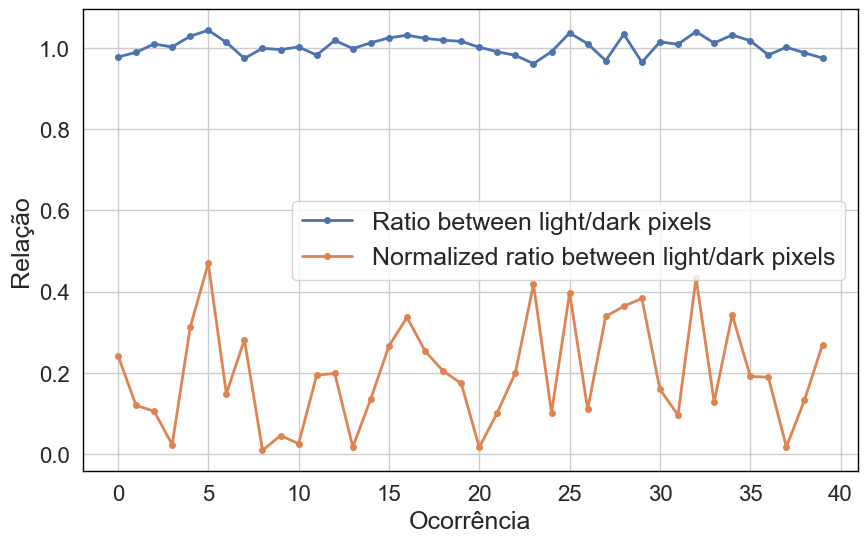

In [27]:
df = df_train.loc[(df_train['defect_percentage'] == 0.00) & (df_train['grain_quantity'] == 100), ['npixels_1to255_per_grain', 'ratio_80to255_by_1to80', 'normalized_ratio_80to255_by_1to80']].copy()
display(len(df))

# Assuming df is the DataFrame you created earlier
x = np.arange(len(df))
y1 = df['ratio_80to255_by_1to80']
y2 = df['normalized_ratio_80to255_by_1to80']

# Set the style and context for a more elegant plot
sns.set(style='whitegrid', context='notebook')

plt.figure(figsize=(10, 6))

plt.plot(x, y1, label='Ratio between light/dark pixels', marker='o', linestyle='-', linewidth=2, markersize=4)
plt.plot(x, y2, label='Normalized ratio between light/dark pixels', marker='o', linestyle='-', linewidth=2, markersize=4)

plt.xlabel('Ocorrência', fontsize=18)
plt.ylabel('Relação', fontsize=18)
plt.legend(fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

# Save and display the plot
plt.savefig('..\without_normalization.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
df1 = df_train.copy()
df1, df_test = normalize_dataset(df1, df_test, 'ratio_80a255_por_1a80', 1.000)
df1 = df1.loc[(df1['percentual_defeitos'] == 0.00) & (df1['qtde_graos'] == 100), ['npixels_1a255_por_grao', 'ratio_80a255_por_1a80', 'ratio_80a255_por_1a80_normalizado']].copy()
display(len(df1))


# Assuming df is the DataFrame you created earlier
x = np.arange(len(df1))
y3 = df1['ratio_80a255_por_1a80']
y4 = df1['ratio_80a255_por_1a80_normalizado']

# Set the style and context for a more elegant plot
sns.set(style='whitegrid', context='notebook')

plt.figure(figsize=(10, 6))

plt.plot(x, y3, label='Relação entre pixels claros/escuros', marker='o', linestyle='-', linewidth=2, markersize=4)
plt.plot(x, y4, label='Relação entre pixels claros/escuros normalizada', marker='o', linestyle='-', linewidth=2, markersize=4)

plt.xlabel('Ocorrência', fontsize=18)
plt.ylabel('Relação', fontsize=18)
# plt.title('Comparison of ratio_80a255_por_1a80 and ratio_80a255_por_1a80_normalizado', fontsize=16)
plt.legend(fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Set the plot borders to black
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

# Save and display the plot
plt.savefig('normalizacao_1.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
df2 = df_train.copy()
df2, df_test = normalize_dataset(df2, df_test, 'ratio_80a255_por_1a80', 0.750)
df2 = df2.loc[(df2['percentual_defeitos'] == 0.00) & (df2['qtde_graos'] == 100), ['npixels_1a255_por_grao', 'ratio_80a255_por_1a80', 'ratio_80a255_por_1a80_normalizado']].copy()
display(len(df2))

# Assuming df is the DataFrame you created earlier
x = np.arange(len(df2))
y5 = df2['ratio_80a255_por_1a80']
y6 = df2['ratio_80a255_por_1a80_normalizado']

# Set the style and context for a more elegant plot
sns.set(style='whitegrid', context='notebook')

plt.figure(figsize=(10, 6))

plt.plot(x, y5, label='Relação entre pixels claros/escuros', marker='o', linestyle='-', linewidth=2, markersize=4)
plt.plot(x, y6, label='Relação entre pixels claros/escuros normalizada', marker='o', linestyle='-', linewidth=2, markersize=4)

plt.xlabel('Ocorrência', fontsize=18)
plt.ylabel('Relação', fontsize=18)
# plt.title('Comparison of ratio_80a255_por_1a80 and ratio_80a255_por_1a80_normalizado', fontsize=16)
plt.legend(fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Set the plot borders to black
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

# Save and display the plot
plt.savefig('normalizacao_075.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
df3 = df_train.copy()
df3, df_test = normalize_dataset(df3, df_test, 'ratio_80a255_por_1a80', 0.500)
df3 = df3.loc[(df3['percentual_defeitos'] == 0.00) & (df3['qtde_graos'] == 100), ['npixels_1a255_por_grao', 'ratio_80a255_por_1a80', 'ratio_80a255_por_1a80_normalizado']].copy()
# display(len(df2))


# Assuming df is the DataFrame you created earlier
x = np.arange(len(df3))
y7 = df3['ratio_80a255_por_1a80']
y8 = df3['ratio_80a255_por_1a80_normalizado']

# Set the style and context for a more elegant plot
sns.set(style='whitegrid', context='notebook')

plt.figure(figsize=(10, 6))

plt.plot(x, y7, label='Relação entre pixels claros/escuros', marker='o', linestyle='-', linewidth=2, markersize=4)
plt.plot(x, y8, label='Relação entre pixels claros/escuros normalizada', marker='o', linestyle='-', linewidth=2, markersize=4)

plt.xlabel('Ocorrência', fontsize=18)
plt.ylabel('Relação', fontsize=18)
# plt.title('Comparison of ratio_80a255_por_1a80 and ratio_80a255_por_1a80_normalizado', fontsize=16)
plt.legend(fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Set the plot borders to black
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

# Save and display the plot
plt.savefig('normalizacao_050.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Assuming df is the DataFrame you created earlier
x = np.arange(len(df))
y1 = df['ratio_80a255_por_1a80']
y2 = df['ratio_80a255_por_1a80_normalizado']

# Set the style and context for a more elegant plot
sns.set(style='whitegrid', context='notebook')

plt.figure(figsize=(10, 6))

plt.plot(x, y1, label='Relação entre pixels claros/escuros', marker='o', linestyle='-', linewidth=2, markersize=4)
plt.plot(x, y2, label='Relação entre pixels claros/escuros normalizada', marker='o', linestyle='-', linewidth=2, markersize=4)

plt.xlabel('Ocorrência', fontsize=14)
plt.ylabel('Relação', fontsize=14)
# plt.title('Comparison of ratio_80a255_por_1a80 and ratio_80a255_por_1a80_normalizado', fontsize=16)
plt.legend(fontsize=12)

# Set the plot borders to black
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

# Save and display the plot
plt.savefig('sem_normalizacao.pdf', dpi=300, bbox_inches='tight')
plt.show()

#### Plots the boxplot to verify the importance of cross-validation

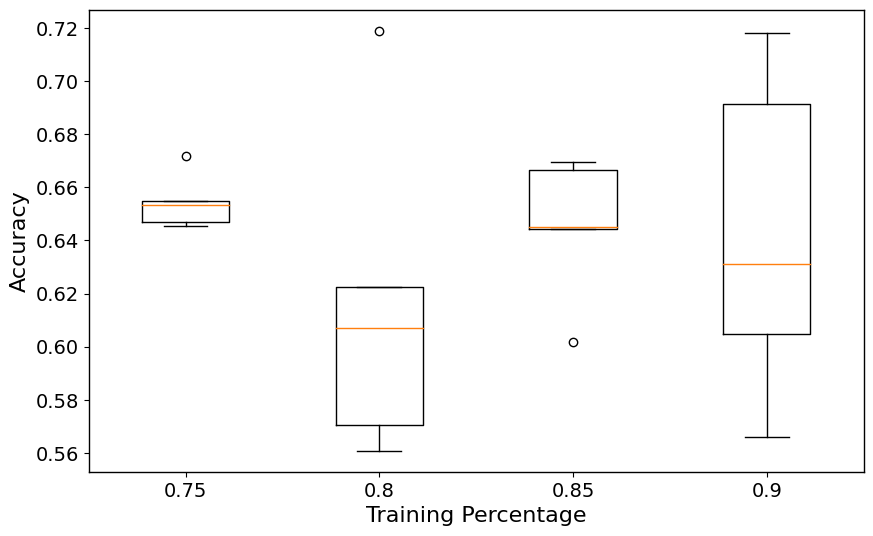

In [30]:
# Define the train ratios and the range of iterations
train_ratio = [0.75, 0.8, 0.85, 0.9]
iterations = range(1, 6)

# Initialize lists to store accuracy data and corresponding x-axis labels
accuracy_data = []
x_labels = []

# For each training ratio, calculate accuracy for each iteration and append to 'accuracy_data'
# Also, append the training ratio to 'x_labels'
for ratio in train_ratio:
    accuracy = []
    for i in iterations:
        accuracy.append(classification_metrics_results[ratio][thresh_good[1]]['defect_stratified'][i]['accuracy'])

    accuracy_data.append(accuracy)
    x_labels.append(ratio)

# Set up the plot with a specified size and style
plt.figure(figsize=(10, 6))
plt.style.use('default')

# Create the boxplot using the 'accuracy_data' and label the x-axis with 'x_labels'
plt.boxplot(accuracy_data, labels=x_labels)

# Set the x and y axis labels
plt.xlabel('Training Percentage', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)

# Set the font size for x and y tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set the plot borders to black and set the border line width
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

# Remove gridlines from the plot
plt.grid(False)

# Save the figure as a PDF file with a specified dpi and bounding box tightness
plt.savefig(r'..\accuracy_boxplot_defect_stratified.pdf', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()
